<a href="https://colab.research.google.com/github/wesley34/comp3414_course_material/blob/master/ch10_tensorflow_2.0_basic/tensorflowIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction on 2 major patterns in tensorflow 2

In [317]:
import tensorflow as tf
import numpy as np

In [318]:
tf.__version__ # 2.x.x

'2.3.0'

### keras

In [319]:
# create fake data
fake_data = np.random.random([100,50,50])
x = fake_data # shape = [100,50,50]
y = 3 * np.mean(x,axis=-1) # shape = [100,50,]
y = np.expand_dims(y,axis=-1) # shape = [100,50,1] # better practise 

In [320]:
x_train,y_train,x_test,y_test = x[:70],y[:70],x[70:],y[70:]

In [321]:
# please check the x_train,y_train,x_test,y_test shape yourself

In [322]:
# create your model with tf.keras.Sequential
# you can wrap you layers/activation functions/customization inside
# you should check the different layers functions yourself as there are plenty of parameters
# method 1
# you can input layers sequence with list of layers
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(5), # after any input , the shape will become batch_size,x,x,...,5
    tf.keras.layers.Dense(1)
    ] # after this, the shape will become batch_size,x,x,...,1
)

In [323]:
# method 2
# you can use add
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))


In [324]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.04),loss='mse',metrics=["mae","mse"])

In [325]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 4ms/step - loss: 1.9841 - mae: 1.1593 - mse: 1.9841
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.5340 - mae: 0.6038 - mse: 0.5340
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6237 - mae: 0.7623 - mse: 0.6237
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0782 - mae: 0.2294 - mse: 0.0782
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2741 - mae: 0.4939 - mse: 0.2741
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1481 - mse: 0.0335
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.1556 - mae: 0.3767 - mse: 0.1556
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 0.0591 - mae: 0.2094 - mse: 0.0591
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0454 - mae: 0.1802 - mse: 0.0454
Epoch 10/10
3/3 [==============================] - 0s 3

In [326]:
# you may check your model layer

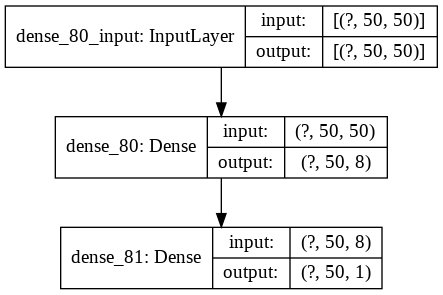

In [327]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [328]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 50, 8)             408       
_________________________________________________________________
dense_81 (Dense)             (None, 50, 1)             9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [329]:
# now you can do prediction with the remaining data

In [330]:
# get predition
y_pred = model.predict(x_test)
print(y_pred[1,1])
print(np.mean(x_test[1,1]))
# not bad 3*mean(x) is about y in this case, but can we have a better approach?


[1.4699047]
0.5134019074185329


In [331]:
# we may define custome function to check for the accuracy using mse/mae

In [332]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [333]:
def eval_function(y_pred,y_test,func):
  total_loss = 0
  for i in range(len(y_pred)):
    total_loss +=  func(y_test[i],y_pred[i])

  total_mean_loss = total_loss/(len(y_pred))
  return total_mean_loss

print("MAE: ",eval_function(y_pred,y_test,mean_absolute_error))
print("MSE: ",eval_function(y_pred,y_test,mean_squared_error))

MAE:  0.08867330484841757
MSE:  0.01226091785177383


In [334]:
# we may also use model.evaluate to do so , it is better as we can set batch_size 

In [335]:
model.evaluate(x_test,y_test,batch_size=1) 

30/30 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0887 - mse: 0.0123


[0.012260916642844677, 0.08867330104112625, 0.012260917574167252]

In [336]:
# in short

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1)]
) # change the layers combination can make the model better
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.04),loss='mse',metrics=["mae","mse"]) # change optimizer/lr-value/loss can make the model better
# metrics mean what indicator you want to see , we wanna see mae and mse
print("Model fitting\n")
model.fit(x_train,y_train,epochs=10) # the more the epoches the more infomation it gets for convergence (typically)
print("Model summary\n")
model.summary()
print("Model prediciton\n")
# get model prediciton
y_pred = model.predict(x_test)
# do evaluation for the accuray
print("Model evaluation\n")
model.evaluate(x=x_test,y=y_test)

Model fitting

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 1.5124 - mae: 0.9953 - mse: 1.5124
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4592 - mae: 0.5495 - mse: 0.4592
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4215 - mae: 0.5527 - mse: 0.4215
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3585 - mae: 0.5337 - mse: 0.3585
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0934 - mae: 0.2465 - mse: 0.0934
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1818 - mae: 0.3698 - mse: 0.1818
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0769 - mae: 0.2269 - mse: 0.0769
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.2367 - mse: 0.0817
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0562 - mae: 0.1930 - mse: 0.0562
Epoch 10/10
3/3 [=======================

[0.02811216562986374, 0.13583439588546753, 0.02811216562986374]

## Dynamic

In [337]:
# it is more complex
# the advantage of it is that : you can make thing more complext 
# consider the keras case, you are doing : layer 1 -> layer 2 -> layer 3 -> output
# but what if : layer 1 -> layer 2.1 -> layer 3.1 ->  merge with below -> layer 4 -> output
#               -> layer 2.2 -> layer 3.1 ->  merge with above
# you canont do so in Sequential case

In [338]:
# you need to make something call Input as start point
# output as endpoint

In [339]:
print(x.shape)
print(y.shape)

(100, 50, 50)
(100, 50, 1)


In [340]:
# you need to define the shape (second_size,) # batch_size,second_size,.... so this case is 50
def create_model():
  x = tf.keras.layers.Input(shape=(50,))
  hidden_1_1 = tf.keras.layers.Dense(6, activation='relu')(x)
  hidden_1_2 = tf.keras.layers.Dense(6, activation='sigmoid')(x)
  hidden_concat = tf.keras.layers.Concatenate(axis=-1)([hidden_1_1,hidden_1_2])
  y = tf.keras.layers.Dense(1, activation='relu')(hidden_concat)

  model = tf.keras.models.Model(x, y) # x means input , y means output
  return model

In [341]:
model = create_model()

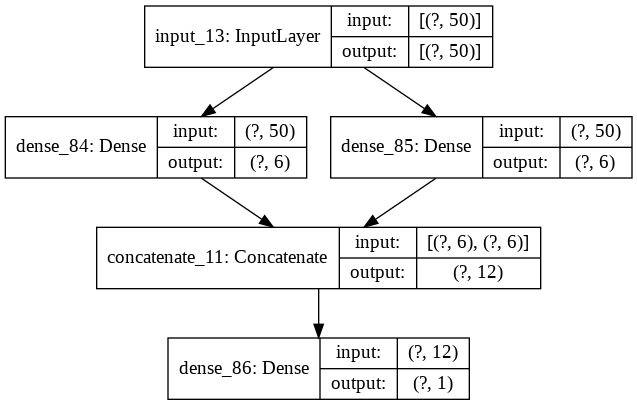

In [342]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [343]:
model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
dense_84 (Dense)                (None, 6)            306         input_13[0][0]                   
__________________________________________________________________________________________________
dense_85 (Dense)                (None, 6)            306         input_13[0][0]                   
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 12)           0           dense_84[0][0]                   
                                                                 dense_85[0][0]       

In [344]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),loss="mse",metrics=["mae","mse"])


In [345]:
model.fit(x_train,y_train,batch_size=6,epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2472 - mae: 0.3541 - mse: 0.2472
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0260 - mae: 0.1316 - mse: 0.0260
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1065 - mse: 0.0178
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0140 - mae: 0.0937 - mse: 0.0140
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0919 - mse: 0.0132
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0904 - mse: 0.0129
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0124 - mae: 0.0887 - mse: 0.0124
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0868 - mse: 0.0118
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0112 - mae: 0.0846 - mse: 0.0112
Epoch 10/10
12/12 [==================

In [346]:
y_pred = model.predict(x_test)
print("MAE: ",eval_function(y_pred,y_test,mean_absolute_error))
print("MSE: ",eval_function(y_pred,y_test,mean_squared_error))

MAE:  0.08100377973609914
MSE:  0.010254966343262615


In [347]:
model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0810 - mse: 0.0103


[0.010254965163767338, 0.08100377768278122, 0.010254965163767338]

## things that you may do to make a better model


1.   different combination of layers and activation function
2.   differrent value inside different layers
3.   add drop-out
4.   use different learning rate
5.   use different loss function
6.   follow some good architecture from books or github or papers
7.   use a better data-preprocessing/data-compressing like pca/sof/....
8.   em-routing instead of backward propogation
9.   learn more statistic and mathematics
10.  use naive approach before fancy approach
11.  believe in your math, stat, skills and luck! 



---
self read this google pix2pix guide on dynamic way on tf2
https://www.tensorflow.org/tutorials/generative/pix2pix
